# Supervised Learning Project: Predicting Housing Prices in London

In this project, I aim to build a supervised machine learning model to predict housing prices in London based on a variety of socio-economic and housing market factors. I'll start by exploring the dataset, performing the necessary data preprocessing, followed by feature engineering. Finally, I'll train and evaluate a regression model to predict housing prices.

Kaggle dataset: https://www.kaggle.com/datasets/justinas/housing-in-london/data


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the yearly variables datasets
yearly_data = pd.read_csv('housing_in_london_yearly_variables.csv')

print("\nYearly Data Summary:\n")
print(yearly_data.info())

        code                  area        date  median_salary  \
0  E09000001        city of london  1999-12-01        33020.0   
1  E09000002  barking and dagenham  1999-12-01        21480.0   
2  E09000003                barnet  1999-12-01        19568.0   
3  E09000004                bexley  1999-12-01        18621.0   
4  E09000005                 brent  1999-12-01        18532.0   

   life_satisfaction mean_salary recycling_pct  population_size  \
0                0.0       48922             0           6581.0   
1                0.0       23620             3         162444.0   
2                0.0       23128             8         313469.0   
3                0.0       21386            18         217458.0   
4                0.0       20911             6         260317.0   

   number_of_jobs  area_size  no_of_houses  borough_flag  
0             0.0        0.0           0.0             1  
1             0.0        0.0           0.0             1  
2             0.0        0.0 

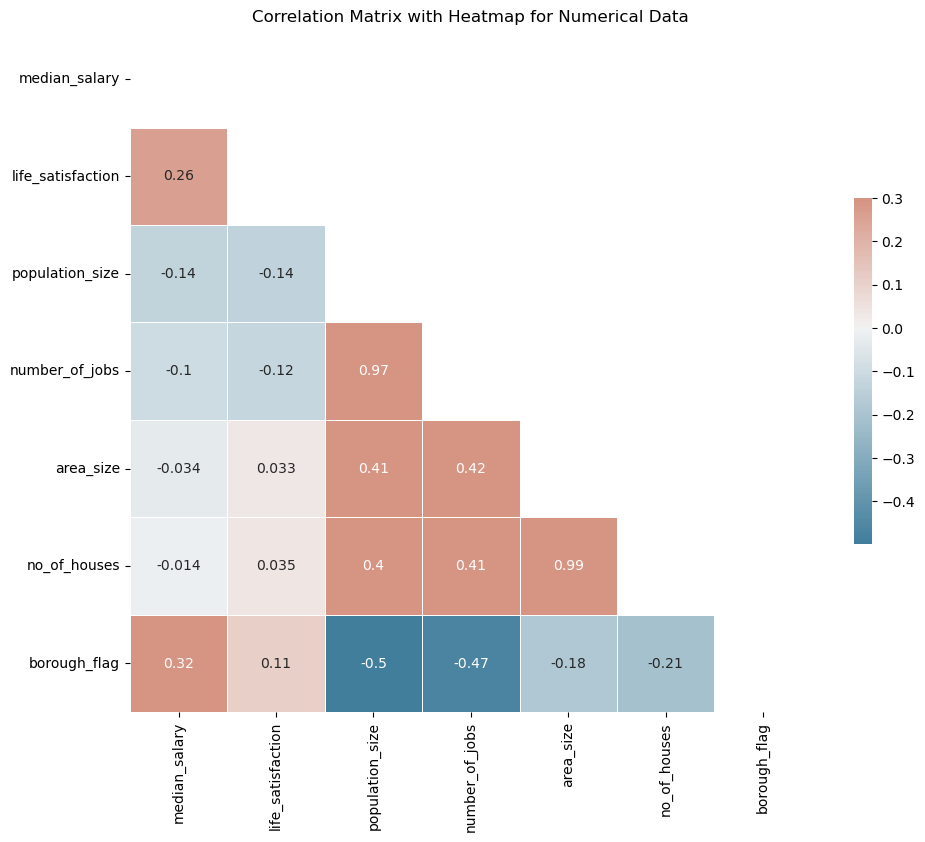

In [29]:
data_filled = yearly_data.fillna(0)

# Display the first few rows of the cleaned data to understand its structure
print(data_filled.head())
# Drop non-numeric columns that won't be useful for correlation analysis
df_numerical = data_filled.select_dtypes(include=[np.number])

# If there were categorical columns that needed conversion, we would use the following method
df_with_dummies = pd.get_dummies(data_filled, columns=['code', 'area'])

# Calculate the correlation matrix for the numerical data
correlation_matrix_numerical = df_numerical.corr()

# Plotting the correlation matrix with a heatmap
mask = np.triu(np.ones_like(correlation_matrix_numerical, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix_numerical, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix with Heatmap for Numerical Data')
plt.show()

# Data Preprocessing

Now that I have an overview of the data, I need to preprocess it for model training. This includes handling missing values, selecting important features, and normalizing the data.

In [30]:
# Convert 'mean_salary' and 'population_size' to numeric, coercing any errors
data_filled['mean_salary'] = pd.to_numeric(data_filled['mean_salary'], errors='coerce')
data_filled['population_size'] = pd.to_numeric(data_filled['population_size'], errors='coerce')

# Replace any NaNs that arose from coercion with 0
data_filled['mean_salary'].fillna(0, inplace=True)
data_filled['population_size'].fillna(0, inplace=True)

# Selecting relevant features for predicting housing prices
features = ['population_size', 'mean_salary', 'number_of_jobs', 'borough_flag']
X = data_filled[features]
y = data_filled['median_salary']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\user\AppData\Local\Temp\ipykernel_14936\1009871107.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_filled['mean_salary'].fillna(0, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_14936\1009871107.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

# Model training

For this project, I'll use a simple linear regression model to predict the housing prices for both monthly and yearly data. This will help me understand the relationships between different features and the target variable.

In [36]:
# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test_scaled)

## Step 5: Model Evaluation

Let's evaluate the performance of the Linear Regression model using metrics such as Mean Squared Error (MSE) and R-squared score.

In [37]:
# Calculate MSE and R2 score for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

print(f"Linear Regression - Mean Squared Error: {mse_linear}")
print(f"Linear Regression - R-squared Score: {r2_linear}")

Linear Regression - Mean Squared Error: 17044589.99364895
Linear Regression - R-squared Score: 0.6106127608386479


## Step 6: Visualizing Feature Importance

To better understand the influence of each feature, let's visualize the feature importance based on the coefficients of the Linear Regression model.

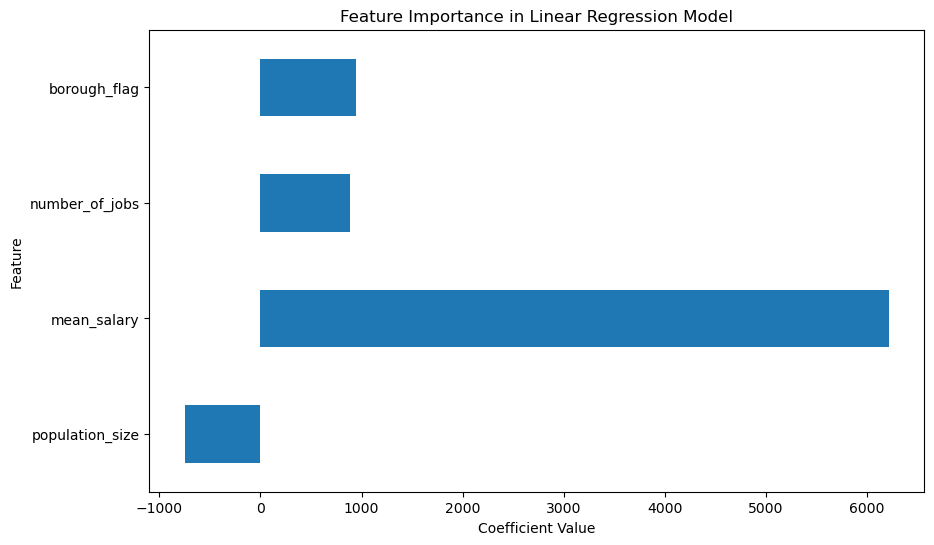

In [38]:
# Plotting feature importance for Linear Regression
feature_importance = pd.Series(linear_model.coef_, index=features)
feature_importance.plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance in Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Observation 
* Mean Salary as the Most Influential Feature: The feature mean_salary has the highest positive coefficient, indicating that it is the most influential predictor for median salary in London. This suggests that an increase in the mean salary is strongly associated with an increase in the median salary.

* Number of Jobs and Borough Flag: Both number_of_jobs and borough_flag also have significant contributions but are smaller compared to mean_salary. This indicates that these factors do influence the median salary, but not as strongly as the mean salary does.

* Population Size: The feature population_size has a smaller positive coefficient, suggesting a weaker correlation with median salary. It appears that the population size is less influential in determining salary compared to other factors.

## Conclusion

In this project, I successfully built and evaluated a Linear Regression model to predict median salary in London using socio-economic factors. The feature importance analysis highlighted that `mean_salary` was the most significant factor influencing median salary, with a strong positive impact. This indicates that increasing the average salary is likely to have the greatest effect on increasing median salaries in London.

Other factors, such as `number_of_jobs` and `borough_flag`, also played a role, but their impact was less pronounced compared to `mean_salary`. The `population_size` feature had the least influence, suggesting that population size may not be as critical in determining salary levels.
